In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [94]:
df=pd.read_excel("Superstore_USA.xlsx")

In [95]:
data=df.copy()

###### since the data did'nt had description column i worked on the product name

# CASE2:

In [5]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [7]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

In [8]:
df['Product Name'] =df['Product Name'].str.lower()

In [9]:
df['Product Name']

0                                                avery 49
1          sanford liquid accent™ tank-style highlighters
2                                              xerox 1968
3                acme® preferred stainless steel scissors
4                                                     v70
                              ...                        
9421        jet-pak recycled peel 'n' seal padded mailers
9422         eldon spacemaker® box, quick-snap lid, clear
9423    chromcraft bull-nose wood oval conference tabl...
9424    tenex 46" x 60" computer anti-static chairmat,...
9425                        staples #10 colored envelopes
Name: Product Name, Length: 9426, dtype: object

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Taha
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#stopwords.words('english')

In [12]:
port_stem = PorterStemmer()
import re

In [13]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [14]:
df['Product Name'] = df['Product Name'].apply(stemming)

In [15]:
df['Product Name']

0                                                   averi
1              sanford liquid accent tank style highlight
2                                                   xerox
3                      acm prefer stainless steel scissor
4                                                       v
                              ...                        
9421                jet pak recycl peel n seal pad mailer
9422              eldon spacemak box quick snap lid clear
9423      chromcraft bull nose wood oval confer tabl base
9424    tenex x comput anti static chairmat rectangula...
9425                                  stapl color envelop
Name: Product Name, Length: 9426, dtype: object

In [16]:
dataset=[]
dataset=pd.DataFrame(dataset)
dataset["Product Name"]=data["Product Name"]
dataset["Product Name shortened"]=df['Product Name']

In [17]:
word_list=df["Product Name"].str.split(" ")

In [18]:
words=[]
for i in word_list:
    for j in i:
        words.append(j)

In [19]:
item2=dataset[dataset["Product Name shortened"]=="sanford liquid accent tank style highlight"][:1]["Product Name shortened"].values.tolist()

In [20]:
item2

['sanford liquid accent tank style highlight']

In [21]:
dict={}
splited=item2[0].split()
for j in dataset["Product Name shortened"]: 
    counter=0
    thing=j.split()
    if item2[0]!=j:
        for i in splited:
            if i in thing:
                counter+=1
                
        dict[j]=counter


In [41]:
#dict

## recommendation system

In [48]:
def recommendation(product_name):
    item2=dataset[dataset["Product Name"]==product_name ]["Product Name shortened"][:1].values.tolist()
    dict={}
    splited=item2[0].split()
    for j,k in zip(dataset["Product Name shortened"],dataset["Product Name"]): 
        counter=0
        thing=j.split()
        if item2[0]!=j:
            for i in splited:
                if i in thing:
                    counter+=1
            if counter !=0:
                dict[k]=counter
    value= {k: v for k, v in sorted(dict.items(), key=lambda item: item[1],reverse=True)}
    return(value.keys())

In [52]:
recommendation("SANFORD Liquid Accent™ Tank-Style Highlighters") 

dict_keys(['Sanford Liquid Accent Highlighters', 'SANFORD Major Accent™ Highlighters', 'Sanford Pocket Accent® Highlighters', '4009® Highlighters by Sanford', 'Staples Pen Style Liquid Stix; Assorted (yellow, pink, green, blue, orange), 5/Pack', 'Avery Hi-Liter® EverBold™ Pen Style Fluorescent Highlighters, 4/Pack', 'Sanford Uni-Blazer™ View Highlighters, Chisel Tip, Yellow', '*Staples* Highlighting Markers', 'DMI Arturo Collection Mission-style Design Wood Chair', 'Avery Hi-Liter Pen Style Six-Color Fluorescent Set', 'Zebra Zazzle Fluorescent Highlighters', 'Sanford 52201 APSCO Electric Pencil Sharpener', 'Avery Hi-Liter® Smear-Safe Highlighters', 'Avery Hi-Liter GlideStik Fluorescent Highlighter, Yellow Ink', 'Sanford Colorific Colored Pencils, 12/Box', 'Tensor "Hersey Kiss" Styled Floor Lamp', 'Sanford EarthWrite® Recycled Pencils, Medium Soft, #2', 'Avery Hi-Liter® Fluorescent Desk Style Markers', 'Avery Binding System Hidden Tab™ Executive Style Index Sets', 'Avery Hi-Liter Comfor

In [25]:
recommendation('Tensor "Hersey Kiss" Styled Floor Lamp')

{'Telescoping Adjustable Floor Lamp': 2,
 'Westinghouse Floor Lamp with Metal Mesh Shade, Black': 2,
 'Tensor Computer Mounted Lamp': 2,
 'SANFORD Liquid Accent™ Tank-Style Highlighters': 1,
 'DMI Arturo Collection Mission-style Design Wood Chair': 1,
 'Avery Hi-Liter Pen Style Six-Color Fluorescent Set': 1,
 'Dana Halogen Swing-Arm Architect Lamp': 1,
 '3M Polarizing Task Lamp with Clamp Arm, Light Gray': 1,
 'Luxo Professional Combination Clamp-On Lamps': 1,
 'Luxo Economy Swing Arm Lamp': 1,
 "Electrix Architect's Clamp-On Swing Arm Lamp, Black": 1,
 'Hot File® 7-Pocket, Floor Stand': 1,
 'Luxo Professional Fluorescent Magnifier Lamp with Clamp-Mount Base': 1,
 'G.E. Halogen Desk Lamp Bulbs': 1,
 'Westinghouse Clip-On Gooseneck Lamps': 1,
 'Electrix 20W Halogen Replacement Bulb for Zoom-In Desk Lamp': 1,
 'Avery Hi-Liter® Fluorescent Desk Style Markers': 1,
 'Staples Pen Style Liquid Stix; Assorted (yellow, pink, green, blue, orange), 5/Pack': 1,
 'Avery Binding System Hidden Tab™ E

In [26]:
recommendation('3M Polarizing Task Lamp with Clamp Arm, Light Gray')

{"Electrix Architect's Clamp-On Swing Arm Lamp, Black": 3,
 'Luxo Adjustable Task Clamp Lamp': 3,
 'Dana Halogen Swing-Arm Architect Lamp': 2,
 '3M Polarizing Light Filter Sleeves': 2,
 'Office Star - Contemporary Task Swivel chair with 2-way adjustable arms, Plum': 2,
 'Luxo Professional Combination Clamp-On Lamps': 2,
 'Luxo Economy Swing Arm Lamp': 2,
 'Luxo Professional Fluorescent Magnifier Lamp with Clamp-Mount Base': 2,
 'Office Star - Task Chair with Contemporary Loop Arms': 2,
 'Hon 4700 Series Mobuis™ Mid-Back Task Chairs with Adjustable Arms': 2,
 'Dana Swing-Arm Lamps': 2,
 'Tyvek ® Top-Opening Peel & Seel ® Envelopes, Gray': 1,
 'Fellowes Twister Kit, Gray/Clear, 3/pkg': 1,
 'Novimex High-Tech Fabric Mesh Task Chair': 1,
 'Global Leather Task Chair, Black': 1,
 'Telescoping Adjustable Floor Lamp': 1,
 'Office Star - Ergonomic Mid Back Chair with 2-Way Adjustable Arms': 1,
 'Office Star - Mid Back Dual function Ergonomic High Back Chair with 2-Way Adjustable Arms': 1,
 'Ten

## CLUSTERING

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [97]:
df=data.copy()

In [99]:
product_descriptions1 = df["Product Name"]

In [101]:
product_descriptions1

0                                          Avery 49
1    SANFORD Liquid Accent™ Tank-Style Highlighters
2                                        Xerox 1968
3          Acme® Preferred Stainless Steel Scissors
4                                               V70
Name: Product Name, dtype: object

In [100]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1)
print(X1)

  (0, 1)	0.7071067811865475
  (0, 4)	0.7071067811865475
  (1, 5)	0.40824829046386296
  (1, 12)	0.40824829046386296
  (1, 13)	0.40824829046386296
  (1, 2)	0.40824829046386296
  (1, 6)	0.40824829046386296
  (1, 8)	0.40824829046386296
  (2, 0)	0.7071067811865475
  (2, 15)	0.7071067811865475
  (3, 9)	0.4472135954999579
  (3, 11)	0.4472135954999579
  (3, 10)	0.4472135954999579
  (3, 7)	0.4472135954999579
  (3, 3)	0.4472135954999579
  (4, 14)	1.0


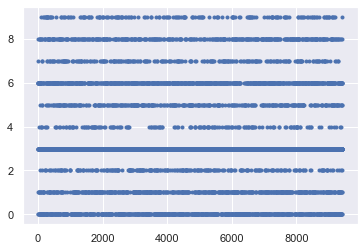

In [8]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [9]:
kmeans

KMeans(n_clusters=10)

In [10]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [11]:
#order_centroids

In [12]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 newell
 binding
 gbc
 pencil
 tables
 printer
 conference
 message
 sharpener
 series
Cluster 1:
 binders
 ring
 wilson
 jones
 hanging
 durable
 binder
 post
 avery
 poly
Cluster 2:
 staples
 pack
 10
 envelopes
 imation
 minute
 cd
 80
 diskettes
 ibm
Cluster 3:
 chair
 global
 leather
 task
 arms
 swivel
 high
 office
 chairs
 star
Cluster 4:
 keyboard
 key
 microsoft
 104
 micro
 belkin
 internet
 logitech
 access
 fellowes
Cluster 5:
 clock
 wall
 impressions
 executive
 diameter
 12
 13
 thomas
 seth
 round
Cluster 6:
 xerox
 210
 1881
 21
 1894
 1922
 1983
 23
 1893
 1927
Cluster 7:
 avery
 desk
 accessories
 eldon
 binder
 expressions
 494
 wood
 508
 481
Cluster 8:
 bookcases
 collection
 bush
 shelf
 table
 sullivan
 duty
 heavy
 assembled
 fully
Cluster 9:
 file
 personal
 black
 stacking
 standard
 box
 letter
 tenex
 eldon
 snap


C:\Users\Taha PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print(prediction)
    print_cluster(prediction[0])
    print(type(prediction[0]))

In [16]:
show_recommendations('3M Polarizing Task Lamp with Clamp Arm, Light Gray')

[0]
Cluster 0:
 newell
 binding
 gbc
 pencil
 tables
 printer
 conference
 message
 sharpener
 series
<class 'numpy.int32'>


### to give similar prod

In [17]:
prod=df["Product Name"][:9421]

In [59]:
list=[]
for i in prod:
    Y = vectorizer.transform([i])
    prediction = model.predict(Y)
    list.append(str(prediction))
    #print(prediction)

In [69]:
dummy=df[:9421].copy()

In [70]:
dummy["clusters"]=list

In [71]:
dummy

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,clusters
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32000,2,5.90,88525,[7]
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56000,4,13.01,88522,[0]
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.64000,7,49.92,88523,[6]
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.51000,7,41.64,88523,[0]
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.20230,8,1446.67,88523,[0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9416,24933,Medium,0.01,7.64,5.83,3400,Florence Gold,Regular Air,Corporate,Office Supplies,...,West Virginia,Fairmont,26554,2012-11-29,2012-11-29,3.31200,8,67.50,87545,[0]
9417,23413,Critical,0.07,115.79,1.99,3400,Florence Gold,Regular Air,Corporate,Technology,...,West Virginia,Fairmont,26554,2013-04-27,2013-04-29,606.30990,8,878.71,87546,[0]
9418,23414,Critical,0.02,37.44,4.27,3400,Florence Gold,Regular Air,Corporate,Office Supplies,...,West Virginia,Fairmont,26554,2013-04-27,2013-04-30,-15.03000,1,43.90,87546,[0]
9419,24912,Medium,0.05,35.99,1.25,3400,Florence Gold,Regular Air,Small Business,Technology,...,West Virginia,Fairmont,26554,2013-10-04,2013-10-05,411.48150,19,596.35,87549,[0]


In [90]:
def show_recommendations(product):
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print(prediction)
    return(dummy[dummy["clusters"]==str(prediction)]["Product Name"].head(15))
#to make cluster visible    
#     print_cluster(prediction[0])
#     print(type(prediction[0]))

In [91]:
#choose a prod
df["Product Name"][:9421]

0                                                Avery 49
1          SANFORD Liquid Accent™ Tank-Style Highlighters
2                                              Xerox 1968
3                Acme® Preferred Stainless Steel Scissors
4                                                     V70
                              ...                        
9416    Rediform Wirebound "Phone Memo" Message Book, ...
9417    Verbatim DVD-R, 4.7GB, Spindle, WE, Blank, Ink...
9418    Sanford Prismacolor® Professional Thick Lead A...
9419                                          Accessory23
9420    Bush Advantage Collection® Round Conference Table
Name: Product Name, Length: 9421, dtype: object

## Recommendation

In [92]:
for i in show_recommendations("Bush Advantage Collection® Round Conference Table"):
    print(i)

[8]
Lesro Sheffield Collection Coffee Table, End Table, Center Table, Corner Table
O'Sullivan 5-Shelf Heavy-Duty Bookcases
Atlantic Metals Mobile 5-Shelf Bookcases, Custom Colors
Atlantic Metals Mobile 5-Shelf Bookcases, Custom Colors
Bush Westfield Collection Bookcases, Fully Assembled
Bush Mission Pointe Library
Bush Westfield Collection Bookcases, Fully Assembled
Bush Heritage Pine Collection 5-Shelf Bookcase, Albany Pine Finish, *Special Order
Bush Advantage Collection® Racetrack Conference Table
Lesro Sheffield Collection Coffee Table, End Table, Center Table, Corner Table
Lesro Sheffield Collection Coffee Table, End Table, Center Table, Corner Table
O'Sullivan 5-Shelf Heavy-Duty Bookcases
O'Sullivan 2-Shelf Heavy-Duty Bookcases
Rush Hierlooms Collection 1" Thick Stackable Bookcases
Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled
